# Load R Packages 

In [84]:
install.packages(c("dplyr", "dtplyr", "data.table", "lubridate", "ggplot2"))


The downloaded binary packages are in
	/var/folders/by/g895l7l128j9y19qqn66xcxh0000gn/T//RtmpBQgEvO/downloaded_packages


In [85]:
#| warning: false
library(dplyr)
library(dtplyr)
library(data.table)
library(lubridate)
library(ggplot2)

options(repr.plot.width = 15, repr.plot.height = 5)  # For Jupyter notebooks

In [86]:
df <- fread("/Users/ivanhung/Documents/GitHub/final-r-assignment/dataset.csv")

In [87]:
head(df)

tic,datadate,conm,exchg,add1,addzip,busdesc,city,conml,fax,loc,phone,sic,weburl,cshtrd,prccd,prchd,prcld,prcod,gvkey
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AIR,01/04/2010,AAR CORP,11,"One AAR Place, 1100 North Wood Dale Road",60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets in North America, Europe, Africa, Asia, and internationally. It operates through four segments: Parts Supply, Repair & Engineering, Integrated Solutions, and Expeditionary Services.",Wood Dale,AAR Corp,630 227 2039,USA,630 227 2000,5080,www.aarcorp.com,460537,23.77,23.77,22.99,23.19,1004
AIR,01/05/2010,AAR CORP,11,"One AAR Place, 1100 North Wood Dale Road",60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets in North America, Europe, Africa, Asia, and internationally. It operates through four segments: Parts Supply, Repair & Engineering, Integrated Solutions, and Expeditionary Services.",Wood Dale,AAR Corp,630 227 2039,USA,630 227 2000,5080,www.aarcorp.com,496257,24.23,24.28,23.72,23.72,1004
AIR,01/06/2010,AAR CORP,11,"One AAR Place, 1100 North Wood Dale Road",60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets in North America, Europe, Africa, Asia, and internationally. It operates through four segments: Parts Supply, Repair & Engineering, Integrated Solutions, and Expeditionary Services.",Wood Dale,AAR Corp,630 227 2039,USA,630 227 2000,5080,www.aarcorp.com,848601,25.45,25.97,23.86,23.86,1004
AIR,01/07/2010,AAR CORP,11,"One AAR Place, 1100 North Wood Dale Road",60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets in North America, Europe, Africa, Asia, and internationally. It operates through four segments: Parts Supply, Repair & Engineering, Integrated Solutions, and Expeditionary Services.",Wood Dale,AAR Corp,630 227 2039,USA,630 227 2000,5080,www.aarcorp.com,330611,25.85,25.91,25.21,25.24,1004
AIR,01/08/2010,AAR CORP,11,"One AAR Place, 1100 North Wood Dale Road",60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets in North America, Europe, Africa, Asia, and internationally. It operates through four segments: Parts Supply, Repair & Engineering, Integrated Solutions, and Expeditionary Services.",Wood Dale,AAR Corp,630 227 2039,USA,630 227 2000,5080,www.aarcorp.com,233956,25.44,26.08,25.38,25.75,1004
AIR,01/11/2010,AAR CORP,11,"One AAR Place, 1100 North Wood Dale Road",60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets in North America, Europe, Africa, Asia, and internationally. It operates through four segments: Parts Supply, Repair & Engineering, Integrated Solutions, and Expeditionary Services.",Wood Dale,AAR Corp,630 227 2039,USA,630 227 2000,5080,www.aarcorp.com,228247,25.15,25.61,24.88,25.61,1004


# Cleaning dataset 

datadate,addzip,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey
<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2010-01-04,10001-2192,2834,52074710,18.93,18.9400,18.235,18.27,8530
2010-01-05,10001-2192,2834,43368460,18.66,18.9300,18.550,18.92,8530
2010-01-06,10001-2192,2834,41405070,18.60,18.8100,18.510,18.66,8530
2010-01-07,10001-2192,2834,39427720,18.53,18.6700,18.460,18.64,8530
2010-01-08,10001-2192,2834,30403370,18.68,18.7100,18.520,18.62,8530
2010-01-11,10001-2192,2834,32442710,18.83,18.9500,18.670,18.83,8530
2010-01-12,10001-2192,2834,41270900,18.77,18.9900,18.640,18.80,8530
2010-01-13,10001-2192,2834,59506750,19.21,19.3000,18.870,18.87,8530
2010-01-14,10001-2192,2834,47258330,19.38,19.5000,19.130,19.20,8530


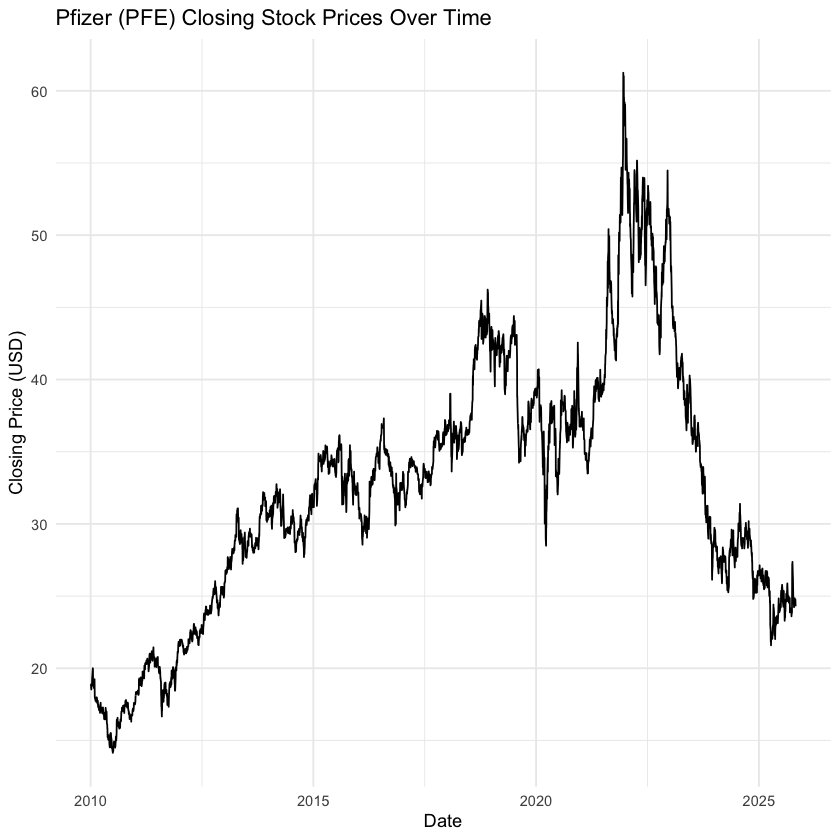

In [88]:
# Setting datadate to a date object
df %>% mutate(datadate = as.Date(datadate, format = "%m/%d/%Y")) -> df

# Remove irrelevant columns and other stocks except for Pfizer (PFE)
pfe <- df[tic == "PFE",
          .(datadate, addzip, sic, cshtrd, prccd, prchd, prcld, prcod, gvkey)]

head(pfe, 15)

# Plot time series of PFE's closing prices 
ggplot(data = pfe, aes(x = datadate, y = prccd)) +
  geom_line() +
  labs(title = "Pfizer (PFE) Closing Stock Prices Over Time",
       x = "Date",
       y = "Closing Price (USD)") +
  theme_minimal()


Next, calculate simple returns so that we can make our prices stationary and allow us to have a better understanding our data as we can proceed to plot Pfizer's ACF and PACF plots and confirm for certain statistical characteristics.

In [89]:
# Calculating simple returns (simple returns in %), which we will denote as s_ret (s_ret_per)
pfe <- pfe %>%
    mutate(ret = ((prccd/lag(prccd))-1)) %>%
    mutate(s_ret = ((prccd/lag(prccd))-1)*100)
    
head(pfe)

datadate,addzip,sic,cshtrd,prccd,prchd,prcld,prcod,gvkey,ret,s_ret
<date>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
2010-01-04,10001-2192,2834,52074710,18.93,18.94,18.235,18.27,8530,NA,NA
2010-01-05,10001-2192,2834,43368460,18.66,18.93,18.550,18.92,8530,-0.014263074,-1.4263074
2010-01-06,10001-2192,2834,41405070,18.60,18.81,18.510,18.66,8530,-0.003215434,-0.3215434
2010-01-07,10001-2192,2834,39427720,18.53,18.67,18.460,18.64,8530,-0.003763441,-0.3763441
2010-01-08,10001-2192,2834,30403370,18.68,18.71,18.520,18.62,8530,0.008094981,0.8094981
2010-01-11,10001-2192,2834,32442710,18.83,18.95,18.670,18.83,8530,0.008029979,0.8029979


Next, we should plot the autocorrelation and partial-autocorrelation functions of our closing prices to identify if there are any seasonal structures or autocorrelation that we might need to deal with.

Warning message in plot.window(...):
“"lags" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in box(...):
“"lags" is not a graphical parameter”
Warning message in title(...):
“"lags" is not a graphical parameter”


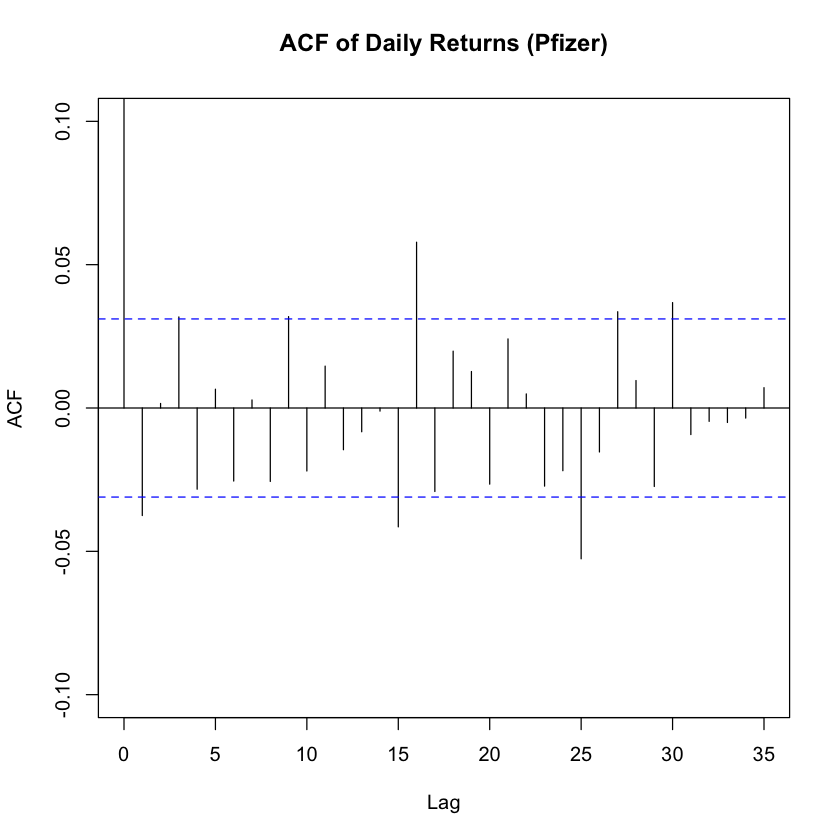

In [93]:
# ACF plot to identify any autocorrelation or seasonality patterns in our data
acf(pfe$ret, lags = 20, 
    na.action = na.omit, 
    main = "ACF of Daily Returns (Pfizer)",
    ylim = c(-0.1,0.1))

Warning message in plot.window(...):
“"lags" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in box(...):
“"lags" is not a graphical parameter”
Warning message in title(...):
“"lags" is not a graphical parameter”


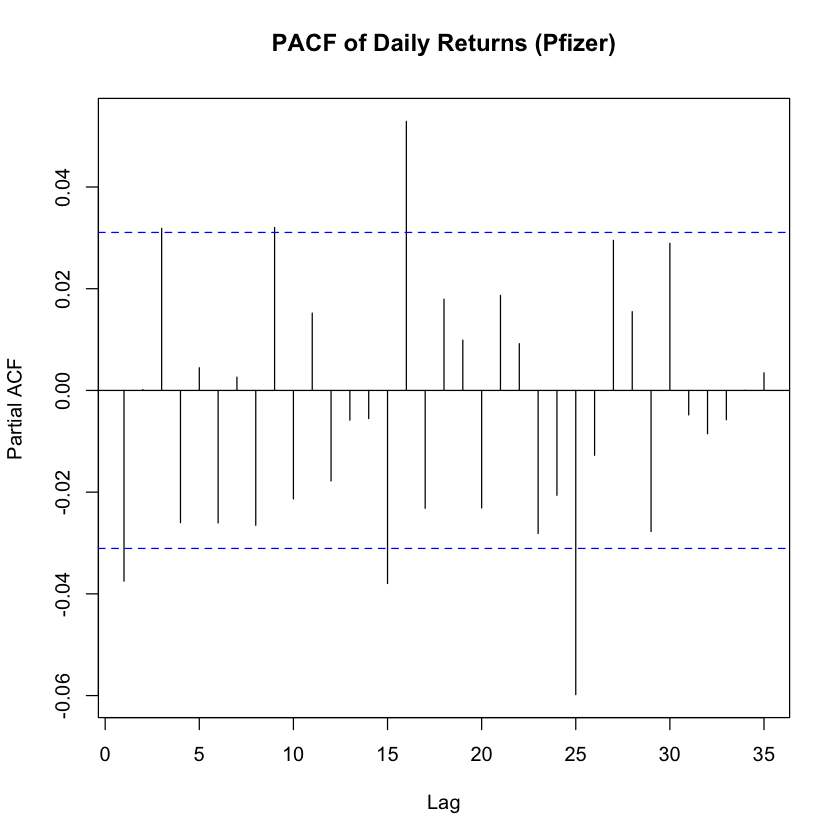

In [91]:
# PACF plot 
pacf(pfe$ret, lags = 20, 
    na.action = na.omit, 
    main = "PACF of Daily Returns (Pfizer)")

We can focus in on a specific time horizon and see if autocorrelation exists within a certain timeframe. This evidence can help us to determine whether there is statistical arbitrage in which our trading strategy can detect a pattern can profit from (potentially short term momentum), as opposed to having white noise (returns which follow a strong form of the EMH where all information about the stock is reflected in its prices). We decide to focus on a relatively long horizon as it can provide us more information of how the stock's price changed before, during, and after COVID; providing us with a holistic story and finding opportunities for statistical arbitrage in the `3' phases of COVID.

In [102]:
# Filter pfe dataframe for January 2019 - December 2022
pfe_covid <- pfe %>%
  filter(datadate >= as.Date("2019-01-01") & datadate <= as.Date("2021-12-31"))

# Check the date range
cat("Date range in filtered data:\n")
cat("Start:", as.character(min(pfe_covid$datadate, na.rm = TRUE)), "\n")
cat("End:", as.character(max(pfe_covid$datadate, na.rm = TRUE)), "\n")
cat("Number of observations:", nrow(pfe_covid), "\n")

# Time Series Plot the event timeframe
ggplot(data = pfe_covid, aes(x = datadate, y = prccd)) +
  geom_line() +
  labs(title = "Pfizer (PFE) Closing Stock Prices during COVID period (2019-2022)",
       x = "Date",
       y = "Closing Price (USD)") +
  theme_minimal()

# ACF
acf(pfe_covid$ret, lags = 20, 
    na.action = na.omit, 
    main = "ACF of Daily Returns (Pfizer)")

# PACF
pacf(pfe_covid$ret, lags = 20, 
    na.action = na.omit, 
    main = "PACF of Daily Returns (Pfizer)")

ERROR: Error in parse(text = input): <text>:12:69: unexpected ','
11: # Time Series Plot the event timeframe
12: ggplot(data = pfe_covid, aes(x = datadate, y = prccd), figsize = (20,
                                                                        ^


In [ ]:
acf(pfe_covid$ret, lags = 20, 
    na.action = na.omit, 
    main = "ACF of Daily Returns (Pfizer)")

In [ ]:
pacf(pfe_covid$ret, lags = 20, 
    na.action = na.omit, 
    main = "PACF of Daily Returns (Pfizer)")

In [ ]:
pfe_week <- pfe %>% 
    mutate(week = format(datadate, "%Y/%m")) %>%
    group_by(week) %>%
    mutate(mean_ret = mean(ret, na.rm = TRUE))
    
head(pfe_week)

acf(pfe_week$ret, lags = 20, 
    na.action = na.omit, 
    main = "ACF of Weekly Returns (Pfizer)")

pacf(pfe_week$ret, lags = 20, 
    na.action = na.omit, 
    main = "PACF of Weekly Returns (Pfizer)")



datadate,year,prccd,yearly_ret
<date>,<date>,<dbl>,<dbl>
2011-12-30,2011-01-01,21.6400,0.235865220
2012-12-31,2012-01-01,25.0793,0.158932532
2013-12-31,2013-01-01,30.6300,0.221325954
2014-12-31,2014-01-01,31.1500,0.016976820
2015-12-31,2015-01-01,32.2800,0.036276083
2016-12-30,2016-01-01,32.4800,0.006195787


Number of years: 15 


Warning message in plot.window(...):
“"lags" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in box(...):
“"lags" is not a graphical parameter”
Warning message in title(...):
“"lags" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in box(...):
“"lags" is not a graphical parameter”
Warning message in title(...):
“"lags" is not a graphical parameter”


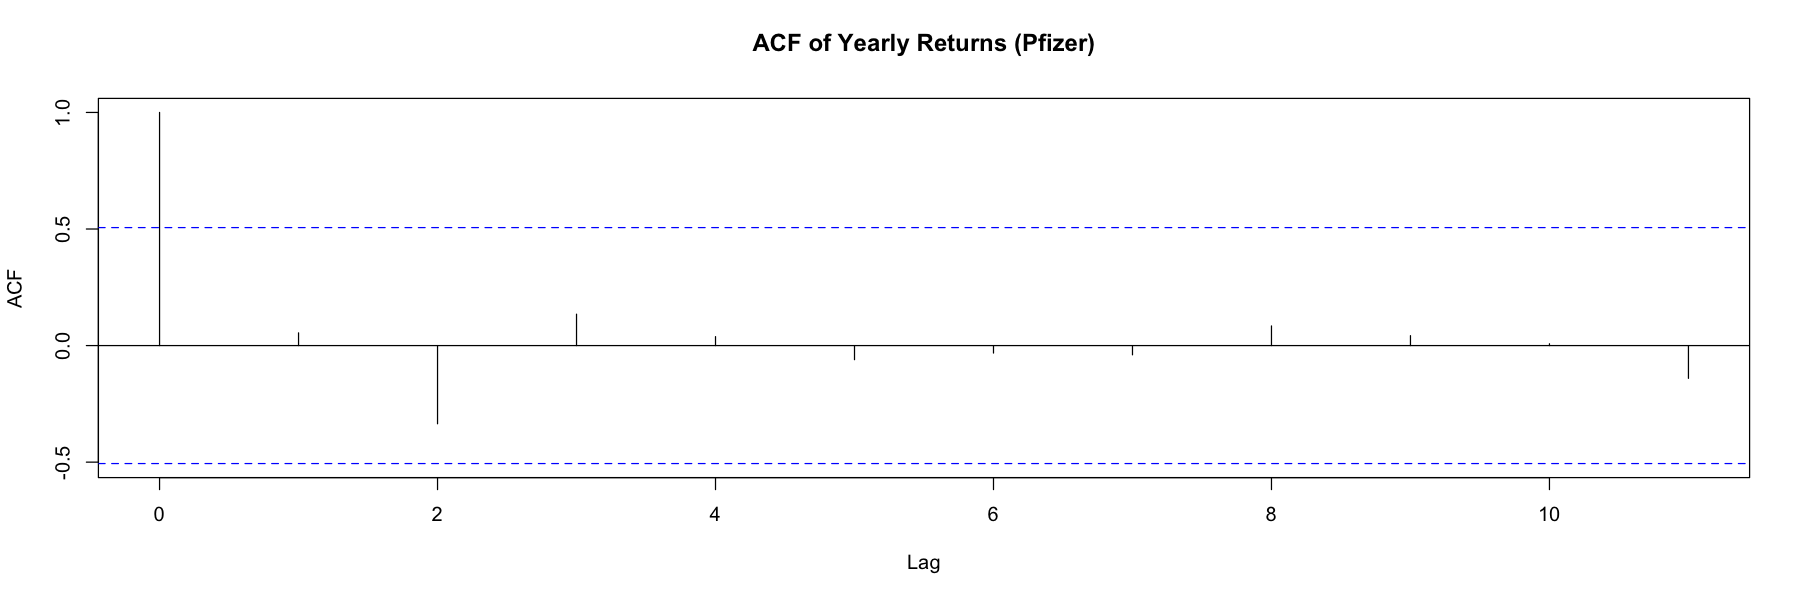

Warning message in plot.window(...):
“"lags" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in box(...):
“"lags" is not a graphical parameter”
Warning message in title(...):
“"lags" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"lags" is not a graphical parameter”
Warning message in box(...):
“"lags" is not a graphical parameter”
Warning message in title(...):
“"lags" is not a graphical parameter”


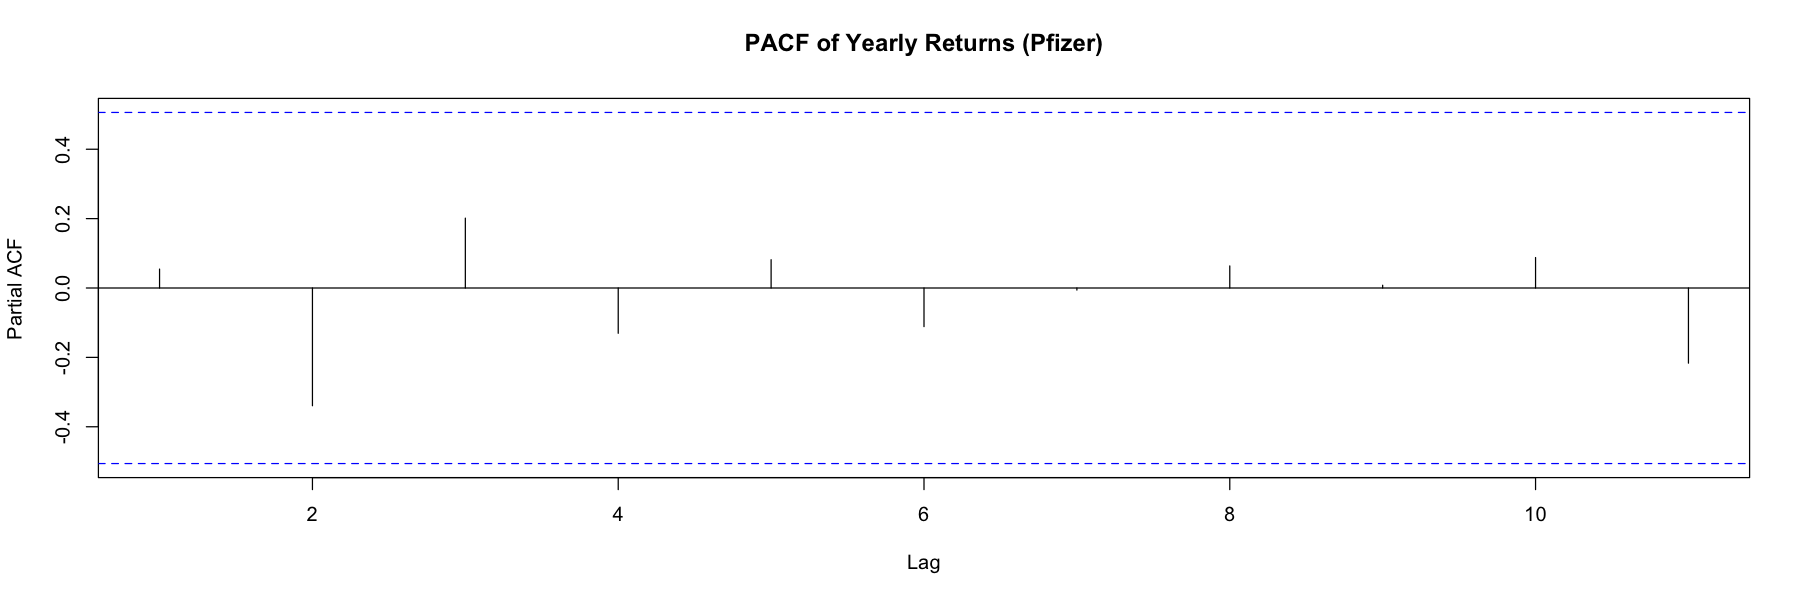

In [165]:
# Create proper yearly returns dataset (one observation per year)
pfe_year <- pfe %>% 
    # Create year identifier
    mutate(year = floor_date(datadate, "year")) %>%
    # Group by year and take the last trading day of each year
    group_by(year) %>%
    arrange(datadate) %>%
    slice_tail(n = 1) %>%  # Keep only the last day of each year
    ungroup() %>%
    # Calculate yearly returns from yearly closing prices
    arrange(datadate) %>%
    mutate(yearly_ret = (prccd / lag(prccd)) - 1) %>%
    # Keep only relevant columns
    select(datadate, year, prccd, yearly_ret) %>%
    # Remove first row (NA yearly return)
    filter(!is.na(yearly_ret))
    
head(pfe_year)
cat("Number of years:", nrow(pfe_year), "\n")

# ACF and PACF for true yearly returns
acf(pfe_year$yearly_ret, lags = 20, 
    na.action = na.omit, 
    main = "ACF of Yearly Returns (Pfizer)")

pacf(pfe_year$yearly_ret, lags = 20, 
    na.action = na.omit, 
    main = "PACF of Yearly Returns (Pfizer)")